In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline
# import fastai
from fastai.imports import *

In [2]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

from pathlib import Path

In [3]:
PATH = "data/data-science-bowl-2018/"
arch=resnet34
sz=224
bs=64

In [40]:
%ls '{PATH}00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/images/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552.png'


data/data-science-bowl-2018/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/images/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552.png*


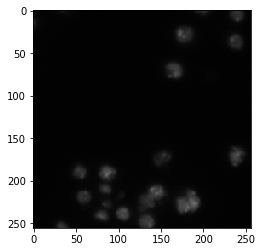

In [4]:
img = plt.imread(f'{PATH}00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/images/00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552.png')
plt.imshow(img)

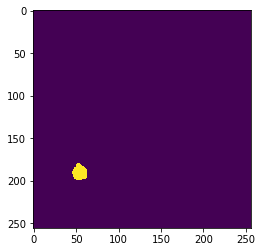

In [5]:
fol = f'{PATH}00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552/masks'
p = f'{fol}/07a9bf1d7594af2763c86e93f05d22c4d5181353c6d3ab30a345b908ffe5aadc.png'
img = plt.imread(p)
plt.imshow(img)

In [6]:
path = Path(f'{PATH}'); # list(path.iterdir())

In [25]:
pics = {}

for samples in list(path.iterdir()):
    
    if(samples.is_dir()):
        for folders in list(samples.iterdir()):
            if(folders.name == 'images'):
                for p in list(folders.iterdir()):
                    idx = str(p).split('/')[-1].replace('.png', '')
                    pics[idx] = str(p)


In [26]:
len(pics)
pictures = list(map(lambda i: pics[i], pics))
pictures[:4]

['data/data-science-bowl-2018/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5/images/1db1cddf28e305c9478519cfac144eee2242183fe59061f1f15487e925e8f5b5.png',
 'data/data-science-bowl-2018/c395870ad9f5a3ae651b50efab9b20c3e6b9aea15d4c731eb34c0cf9e3800a72/images/c395870ad9f5a3ae651b50efab9b20c3e6b9aea15d4c731eb34c0cf9e3800a72.png',
 'data/data-science-bowl-2018/c322c72b9d411e631580fee9312885088b4bb14ed297aa4b246ec943533b3ffb/images/c322c72b9d411e631580fee9312885088b4bb14ed297aa4b246ec943533b3ffb.png',
 'data/data-science-bowl-2018/9ebcfaf2322932d464f15b5662cae4d669b2d785b8299556d73fffcae8365d32/images/9ebcfaf2322932d464f15b5662cae4d669b2d785b8299556d73fffcae8365d32.png']

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(24, 12))
for i,ax in enumerate(axes.flat):
    ima = plt.imread(pictures[i])
#     b = md.classes[preds[i]]
    ax = show_img(ima, ax=ax)
#     draw_text(ax, (0,0), b)
plt.tight_layout()

In [ ]:
df = pd.read_csv(f'{PATH}stage1_train_labels.csv'); df

In [22]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax